# 图像锐化

## 实验目的

利用所学梯度锐化方法从下图提取边缘

![lena](lena.png)

## 实验环境

- OpenCV
- NumPy
- MatPlotLib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 实验原理

图像边缘的灰度变化明显。将梯度算子与图像做卷积，就可以得到图像的边缘信息。梯度算子的种类很多，针对的任务类型有差异。

### 一阶梯度算子

1. 差分算子

$$ G_x = \begin{pmatrix} 1 & -1 \end{pmatrix} $$

$$ G_y = \begin{pmatrix} -1 \\ 1 \end{pmatrix} $$

差分算子通过直接的相减操作计算亮度差异，因此它能够快速且简单地捕捉图像的基本边缘信息。水平方向算子 $  G_x  $ 用于检测水平方向上亮度的变化，而垂直方向算子 $  G_y  $ 则检测垂直方向上的变化。这些算子不考虑方向之外的其他变化。

差分算子可以通过自定义卷积核并使用`cv2.filter2D()`进行卷积操作

2. Roberts算子

Roberts算子是一个一阶梯度算子，用来检测对角方向上的边缘。其两个卷积核如下：
$$ G_x = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}, \quad G_y = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} $$
Roberts算子通过计算对角线上像素之间的差异来检测边缘。它能够检测出图像中锐利的变化，但对噪声比较敏感。

OpenCV没有内置Roberts算子，但我们可以自定义卷积核并使用`cv2.filter2D()`来实现。

3. Prewitt算子

Prewitt算子是一种改进的一阶梯度算子，通过 3x3 的卷积核检测水平和垂直方向上的边缘。其卷积核如下：
$$ G_x = \begin{pmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{pmatrix}, G_y = \begin{pmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{pmatrix} $$
$$ G_{xy} = \begin{pmatrix} 0 & 1 & 1 \\ -1 & 0 & 1 \\ -1 & -1 & 0 \end{pmatrix}, G_{-xy} = \begin{pmatrix} -1 & -1 & 0 \\ -1 & 0 & 1 \\ 0 & 1 & 1 \end{pmatrix} $$
Prewitt算子通过扩展卷积核的范围，计算水平方向和垂直方向上的梯度。它结合多个像素的亮度信息，计算出的梯度更加稳定，同时也对噪声有一定的抑制作用。

Prewitt算子可以通过自定义卷积核实现，尽管OpenCV没有内置函数。通过`cv2.filter2D()`可以完成卷积。

4. Sobel算子

Sobel算子与Prewitt类似，但对中心像素赋予了更高的权重，因此在噪声条件下更具鲁棒性。其卷积核为：
$$ G_x = \begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix}, G_y = \begin{pmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{pmatrix} $$
$$ G_{xy} = \begin{pmatrix} 0 & 1 & 2 \\ -1 & 0 & 1 \\ -2 & -1 & 0 \end{pmatrix}, G_{-xy} = \begin{pmatrix} -2 & -1 & 0 \\ -1 & 0 & 1 \\ 0 & 1 & 2 \end{pmatrix} $$
它在边缘检测和图像锐化中应用广泛。

OpenCV中有内置的Sobel算子，可以通过`cv2.Sobel()`函数直接使用，但是只有x和y两个方向。

### 二阶梯度算子

1. Laplace算子

Laplace算子是一种二阶梯度算子，主要用于检测图像中亮度变化的加速度。与一阶梯度不同，它直接检测亮度变化的极值。其卷积核如下：
$$ \Delta = \begin{pmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{pmatrix} $$
或
$$ \Delta = \begin{pmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{pmatrix} $$

拉普拉斯算子通过计算图像亮度变化的二阶导数，直接检测亮度变化的加速度。它对边缘变化有更敏感的响应，适合用于图像的锐化。相比一阶梯度算子，拉普拉斯算子更擅长捕捉边缘的极值，并能够对所有方向的边缘进行无偏的检测。

OpenCV中也内置了拉普拉斯算子，可以通过`cv2.Laplacian()`函数直接使用。

## 实验过程

### 差分算子
尝试两个方向的差分算子，并试着将其结果相加。

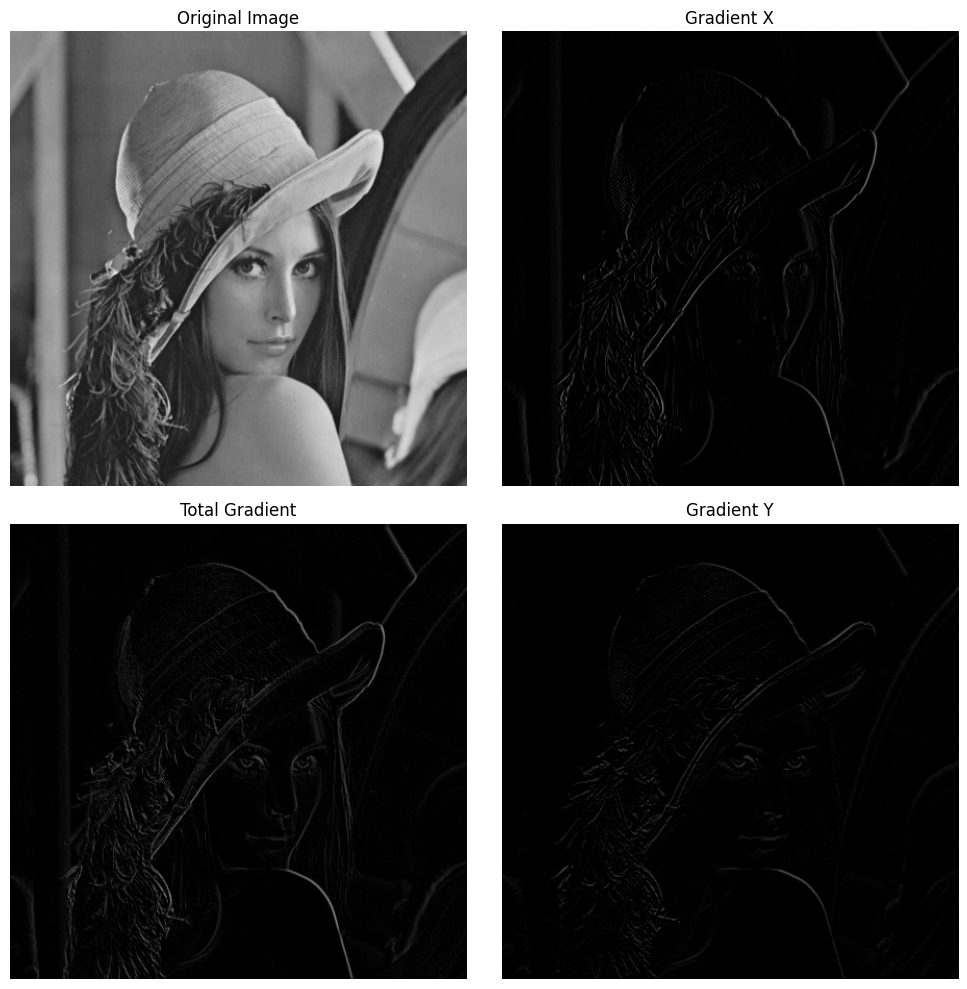

In [12]:
# 读取图像
image = cv2.imread('lena.png')

# 定义水平方向和垂直方向的梯度算子
kernel_x = np.array([[1, -1]], dtype=np.int8)
kernel_y = np.array([[-1], [1]], dtype=np.int8)

# 应用卷积计算水平方向和垂直方向的梯度
grad_x = cv2.filter2D(image, -1, kernel_x)
grad_y = cv2.filter2D(image, -1, kernel_y)
grad_all = grad_x + grad_y

# 使用Matplotlib绘制结果
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(grad_all, cmap='gray')
plt.title('Total Gradient')
plt.axis('off')

plt.tight_layout()
plt.show()

### Roberts算子

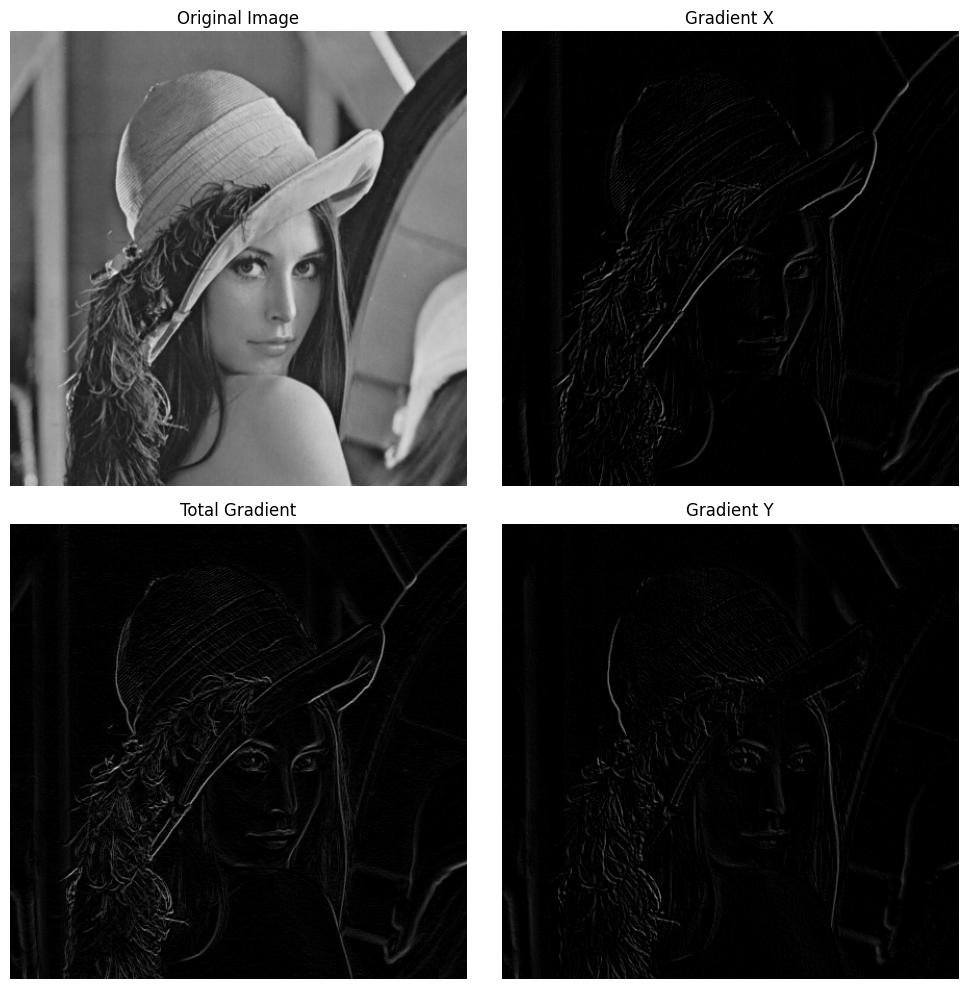

In [13]:
# 读取图像
image = cv2.imread('lena.png')

# 定义水平方向和垂直方向的Roberts算子
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.int8)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.int8)

# 应用卷积计算水平方向和垂直方向的梯度
grad_x = cv2.filter2D(image, -1, roberts_x)
grad_y = cv2.filter2D(image, -1, roberts_y)
grad_all = grad_x + grad_y

# 使用Matplotlib绘制结果
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(grad_all, cmap='gray')
plt.title('Total Gradient')
plt.axis('off')

plt.tight_layout()
plt.show()

可以看出其实Roberts就是斜向的差分算子，检测对角线边缘的能力更强。

### Prewitt算子

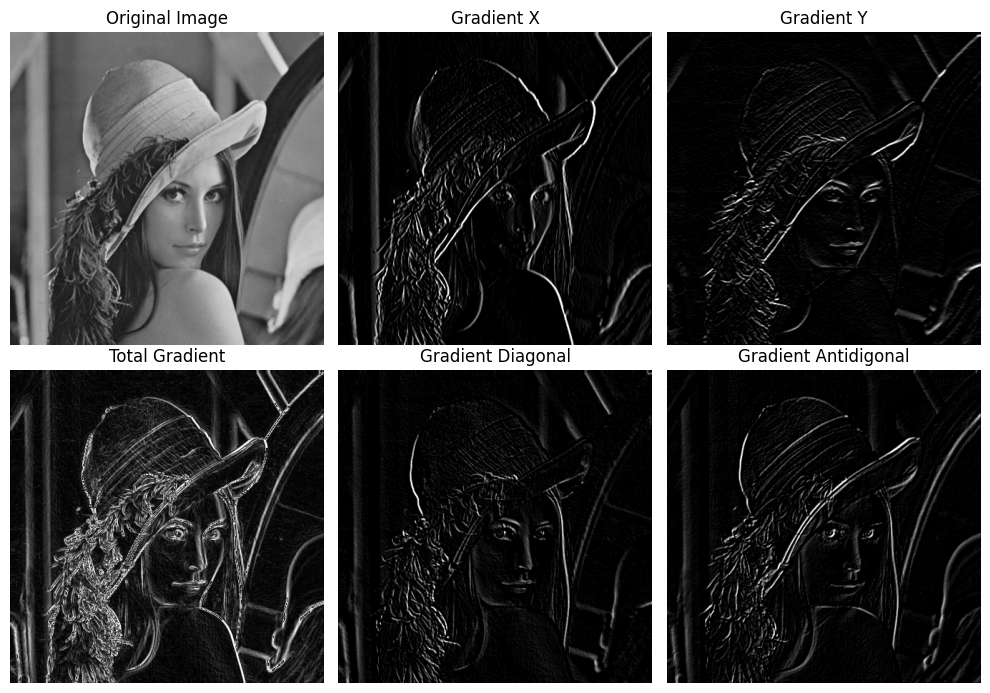

In [11]:
# 读取图像
image = cv2.imread('lena.png')

prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.int8)
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.int8)
prewitt_xy = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]], dtype=np.int8)
prewitt_mxy = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]], dtype=np.int8)

# 应用卷积
grad_x = cv2.filter2D(image, -1, prewitt_x)
grad_y = cv2.filter2D(image, -1, prewitt_y)
grad_xy = cv2.filter2D(image, -1, prewitt_xy)
grad_mxy = cv2.filter2D(image, -1, prewitt_mxy)
grad_all = grad_x + grad_y + grad_xy + grad_mxy

# 使用Matplotlib绘制结果
plt.figure(figsize=(10,7))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(grad_xy, cmap='gray')
plt.title('Gradient Diagonal')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(grad_mxy, cmap='gray')
plt.title('Gradient Antidigonal')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(grad_all, cmap='gray')
plt.title('Total Gradient')
plt.axis('off')

plt.tight_layout()
plt.show()

Prewitt相比前两者检测到了更多的边缘。

### Sobel算子

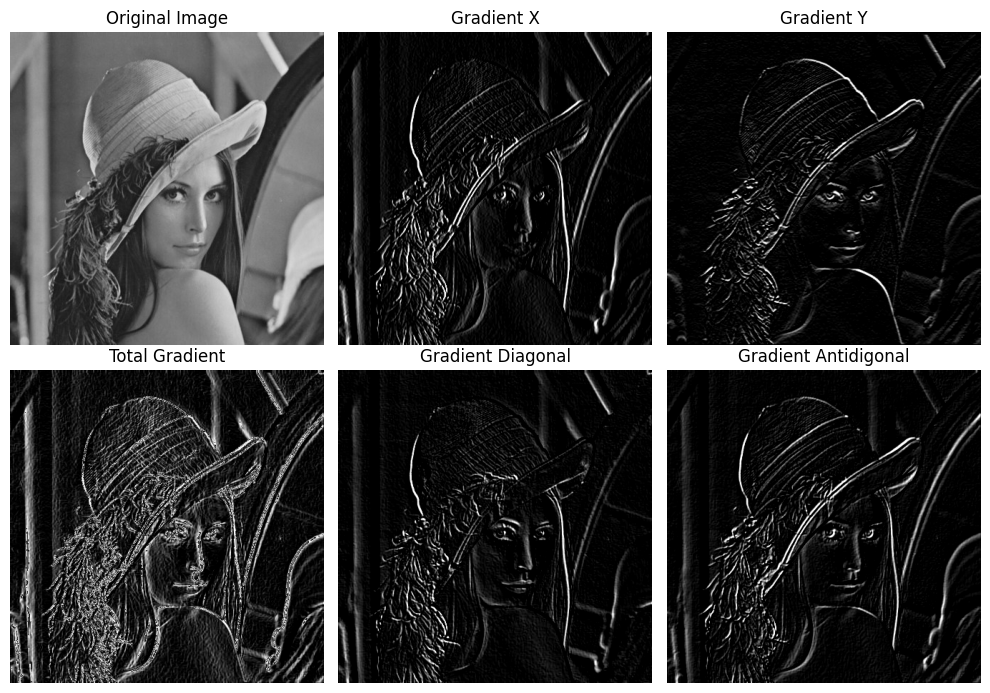

In [14]:
# 读取图像
image = cv2.imread('lena.png')

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.int8)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.int8)
sobel_xy = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]], dtype=np.int8)
sobel_mxy = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]], dtype=np.int8)

# 应用卷积
grad_x = cv2.filter2D(image, -1, sobel_x)
grad_y = cv2.filter2D(image, -1, sobel_y)
grad_xy = cv2.filter2D(image, -1, sobel_xy)
grad_mxy = cv2.filter2D(image, -1, sobel_mxy)
grad_all = grad_x + grad_y + grad_xy + grad_mxy

# 使用Matplotlib绘制结果
plt.figure(figsize=(10,7))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(grad_xy, cmap='gray')
plt.title('Gradient Diagonal')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(grad_mxy, cmap='gray')
plt.title('Gradient Antidigonal')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(grad_all, cmap='gray')
plt.title('Total Gradient')
plt.axis('off')

plt.tight_layout()
plt.show()

### Laplace算子

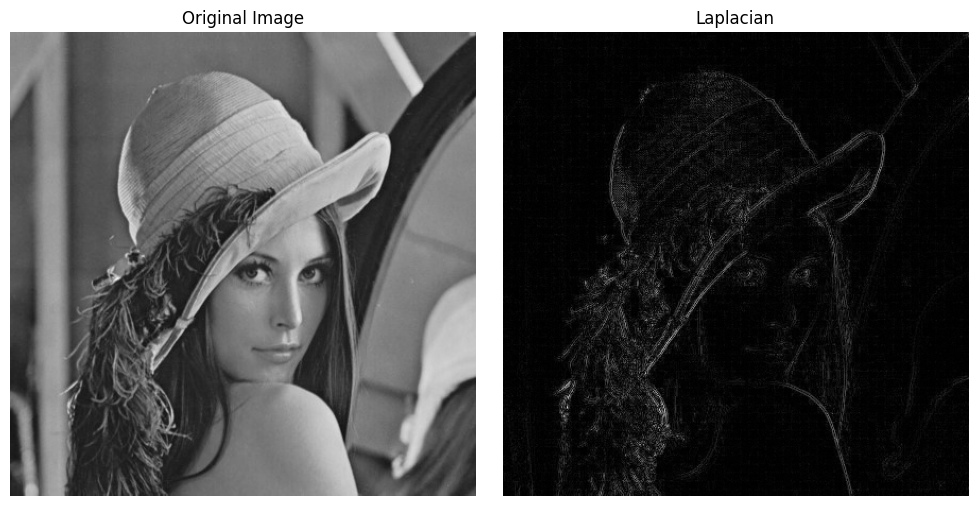

In [21]:
# 读取图像
image = cv2.imread('lena.png')

# 使用Laplace算子
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.abs(laplacian) # 取绝对值，避免负值
laplacian = np.clip(laplacian, 0, 255) # 归一化到 [0, 255]
laplacian = laplacian.astype(np.uint8) # 转换为无符号8位整数

# 使用Matplotlib绘制结果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.tight_layout()
plt.show()


### 实验总结
- 一阶梯度算子（包括基本差分算子、Roberts、Prewitt、Sobel）用于检测图像中的一阶亮度变化，都具有方向性。它们适用于不同的噪声环境和边缘检测需求，差分算子和Roberts算子计算简单，但对噪声敏感，Sobel算子和Prewitt算子相对鲁棒。
- 拉普拉斯算子作为二阶算子，没有方向性，能够更加精确地检测边缘，对图像锐化有较好的效果，但对噪声更加敏感。